### Задание:
In this competition your task will be to predict the mean math exam result (from 0 to 100 points) for students of tutors in test.csv. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).
You can only use these imports:
* import numpy as np
* import pandas as pd
* from sklearn.model_selection import train_test_split
* import matplotlib.pyplot as plt
* import seaborn as sns

https://www.kaggle.com/c/tutors-expected-math-exam-results

Метрика для оценки – Коэффициент детерминации:

$R^2 = 1 - \frac{\sigma^2}{\sigma_y^2}$

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

__загрузим датасеты__

In [16]:
PATH_FOLDER = 'D:\\Cloud\\Git\\geekbrains-data-analysis-alg\\tutors-expected-math-exam-results\\'

In [19]:
train = pd.read_csv(PATH_FOLDER + 'train.csv')
test = pd.read_csv(PATH_FOLDER + 'test.csv')

__посмотрим на исходные данные__

In [14]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


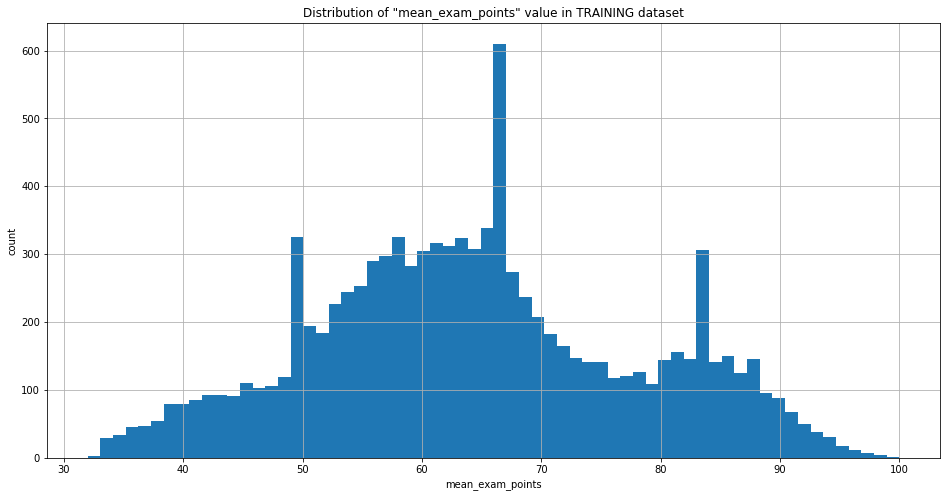

In [24]:
plt.figure(figsize = (16, 8))

train['mean_exam_points'].hist(bins=64)
plt.ylabel('count')
plt.xlabel('mean_exam_points')

plt.title('Distribution of "mean_exam_points" value in TRAINING dataset')
plt.show()

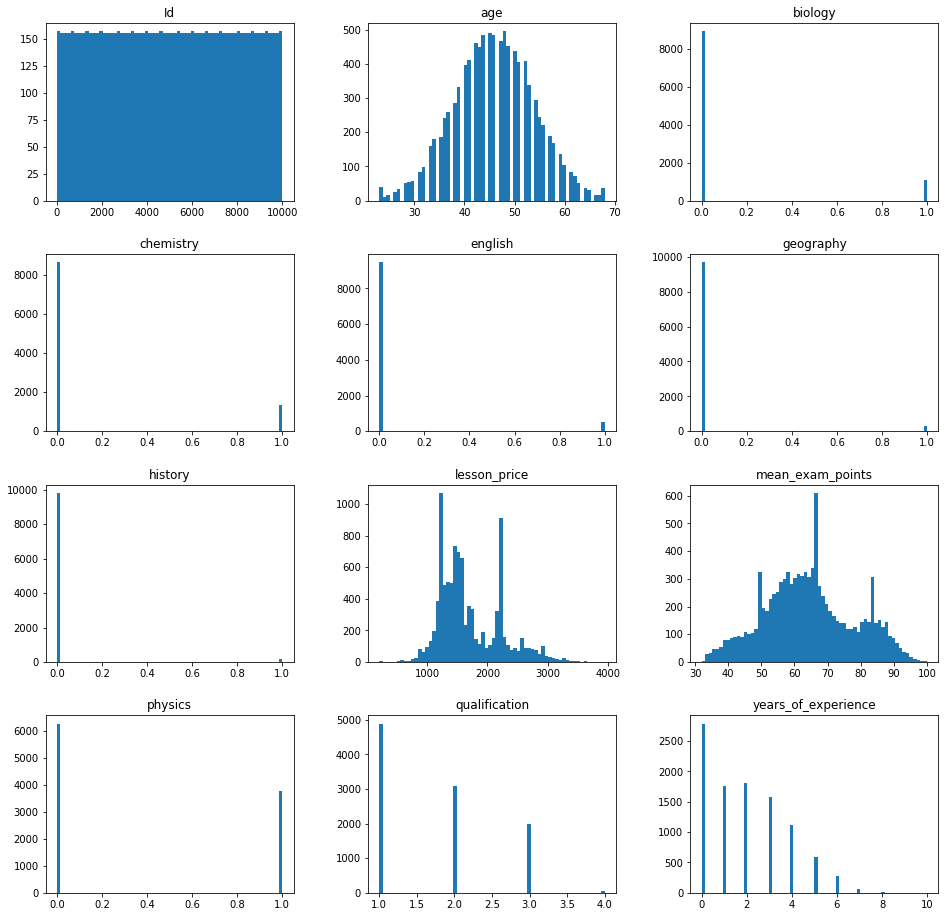

In [27]:
#train.select_dtypes(include=['float64', 'int'])
train.hist(figsize=(16,16), bins=64, grid=False);

In [147]:
y = train['mean_exam_points']
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop(['Id','mean_exam_points'],axis=1), y, test_size=0.3, random_state=42)

In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 10 columns):
age                    7000 non-null float64
years_of_experience    7000 non-null float64
lesson_price           7000 non-null float64
qualification          7000 non-null float64
physics                7000 non-null float64
chemistry              7000 non-null float64
biology                7000 non-null float64
english                7000 non-null float64
geography              7000 non-null float64
history                7000 non-null float64
dtypes: float64(10)
memory usage: 601.6 KB


In [149]:
y_train

9069    43.0
2603    66.0
7738    73.0
1579    64.0
5058    59.0
        ... 
5734    94.0
5191    89.0
5390    69.0
860     48.0
7270    66.0
Name: mean_exam_points, Length: 7000, dtype: float64

#### Градиентный спуск

In [295]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [296]:
def grad_sp(X, y, W, alpha,n):
    for i in range(10):
        y_pred = np.dot(W, X)
        print((y_pred-y).shape, X.T.shape)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 *np.dot(y_pred - y,X.T)))
        
        if i % 1 == 0:
            print(f'i:{i}, W:{W}, err:{err}')
            errors.append(err)
        '''if err < 3:
            #break
            return i, W, errors'''
    return i, W, errors

In [301]:
n = X_train.shape[1]
alpha = 1e-8
errors = []
print(n,alpha)

10 1e-08


In [298]:
W = np.array([0.5, 0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
#W = np.array(train.describe().iloc[1,1:-1]) #возьмем строчку MEAN по нужным столбцам
X_t = np.array(X_train)
#W, alpha
print(f'X_t.shape:{X_t.shape}, W.shape:{W.shape}, W.T.shape:{W.T.shape}')

y_pred = np.dot(W, X_t.T)
y_pred[:10], y_pred.shape

X_t.shape:(7000, 10), W.shape:(10,), W.T.shape:(10,)


(array([ 756.5,  619.5, 1076. ,  749. ,  578. , 1077.5, 1141.5, 1380.5,
         704.5, 1097.5]), (7000,))

In [299]:
i, W, err = grad_sp(X_t.T, y_train, W, alpha,n)
i,W,err

(7000,) (7000, 10)
i:0, W:[-2.01178130e-02  4.75704440e-01 -2.06922075e+01  4.78251775e-01
  4.95792429e-01  4.98516143e-01  4.98754615e-01  4.99398307e-01
  4.99631470e-01  4.99785661e-01], err:722788.6799642857
(7000,) (7000, 10)
i:1, W:[2.25652356e+01 1.52998513e+00 8.99393924e+02 1.42348425e+00
 6.79384118e-01 5.62998518e-01 5.52923484e-01 5.25578077e-01
 5.15636130e-01 5.09090764e-01], err:1362227729.8152444
(7000,) (7000, 10)
i:2, W:[-9.58002386e+02 -4.42434727e+01 -3.90472976e+04 -3.96139610e+01
 -7.29056430e+00 -2.23652569e+00 -1.79878688e+00 -6.10992921e-01
 -1.79221775e-01  1.05097364e-01], err:2567759484259.554
(7000,) (7000, 10)
i:3, W:[4.16145724e+04 1.94306797e+03 1.69528833e+06 1.74207911e+03
 3.38735640e+02 1.19308382e+02 1.00303762e+02 4.87347166e+01
 2.99889087e+01 1.76449760e+01], err:4840152023281057.0
(7000,) (7000, 10)
i:4, W:[-1.80672706e+06 -8.43385471e+04 -7.36030646e+07 -7.56123555e+04
 -1.46844244e+04 -5.15771591e+03 -4.33260614e+03 -2.09367099e+03
 -1.279798

(9, array([2.78711135e+14, 1.30103907e+13, 1.13542264e+16, 1.16642626e+13,
        2.26533985e+12, 7.95721635e+11, 6.68437763e+11, 3.23053008e+11,
        1.97502591e+11, 1.14828842e+11]), [722788.6799642857,
  1362227729.8152444,
  2567759484259.554,
  4840152023281057.0,
  9.123545936870673e+18,
  1.719761901316599e+22,
  3.2417012175799885e+25,
  6.110512609922659e+28,
  1.1518138733309175e+32,
  2.1711356861341267e+35])

Text(0, 0.5, 'MSE')

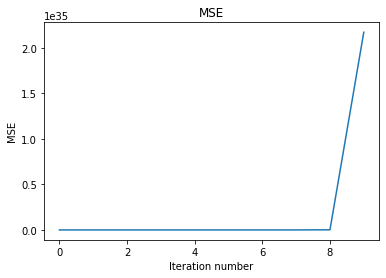

In [300]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(err)), err)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [294]:
errors

[9165387155119.16,
 1.7276488487472648e+16,
 3.256567884336775e+19,
 6.1385358448192645e+22,
 1.1570961716895082e+26,
 722788.6799642857,
 1362227729.8152444,
 2567759484259.554,
 4840152023281057.0,
 9.123545936870673e+18]